# Hydroglaciology

## Importing modules and libraries

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math
import datetime
import time
import obspy

In [2]:
import os, sys
modules = os.path.abspath('Modules//')
if modules not in sys.path:
    sys.path.append(modules)

In [3]:
from hydronoise import hydronoise_plot
from hydronoise import amp_noise_mean_median

In [4]:
from normalize import normalize

## Functions

## Importing data from gauging station and temperature

In [5]:
direct = 'D:\MEMOIRE\HYDRO'
stt_gauging = '\V550\Vdv_data_20221116122909'
stt_temp = '\V299\Vdv_data_20221120143940'

In [6]:
gauging_time = []
gauging_velos = []

with open(direct+stt_gauging+'.csv') as file :
    readcsv = csv.reader(file, delimiter=';')
    line = 0
    for row in readcsv :
        if line > 4 :
            gauging_date = datetime.datetime.strptime(str(row[0]), '%Y-%m-%d %H:%M:%S')
            gauging_time.append(gauging_date)
            gauging_velos.append(float(row[3].replace(',','.')))
            
        line += 1

temp_time = []
temp = []

with open(direct+stt_temp+'.csv') as file :
    readcsv = csv.reader(file, delimiter=';')
    line = 0
    for row in readcsv :
        if line > 4 :
            temp_date = datetime.datetime.strptime(str(row[0]), '%Y-%m-%d %H:%M:%S')
            temp_time.append(temp_date)
            temp.append(float(row[1].replace(',','.')))
            
        line += 1

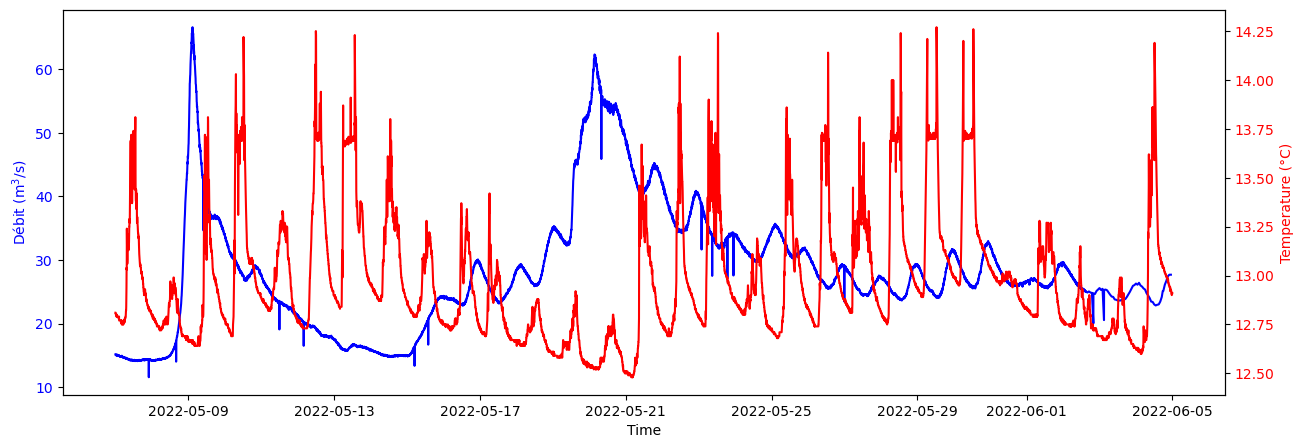

In [7]:
fig, ax1 = plt.subplots(figsize=(15,5)) 
  
ax1.set_xlabel('Time') 
ax1.set_ylabel('Débit (m$^3$/s)', color = 'blue') 
ax1.plot(gauging_time, gauging_velos, label = 'Débit | Station V550', c='blue')
ax1.tick_params(axis ='y', labelcolor = 'blue') 
  
# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('Temperature (°C)', color = 'red') 
ax2.plot(temp_time, temp, label = 'Température | Station V159', c='red')
ax2.tick_params(axis ='y', labelcolor = 'red') 
 
# Show plot

plt.show()

In [8]:
n=1
max_temp = []
max_velos = []
for i in range(len(temp_time)):
    #print(i)
    if temp_time[0] == temp_time[i] - datetime.timedelta(hours=n*24) :
        idx = np.argmax(temp[i-288:i]) + (i-288)
        max_temp.append(temp_time[idx])
        #print(i-456)
        n+= 1
        
n=1        
for i in range(len(gauging_time)):
    #print(i)
    if gauging_time[0] == gauging_time[i] - datetime.timedelta(hours=n*24) :
        idx = np.argmax(gauging_velos[i-289:i]) + (i-289)
        max_velos.append(gauging_time[idx])
        n+= 1
    
delta_time = np.subtract(max_velos, max_temp)

for i in range(len(delta_time)) :
    delta_time[i] = delta_time[i]/datetime.timedelta(hours=1)
    

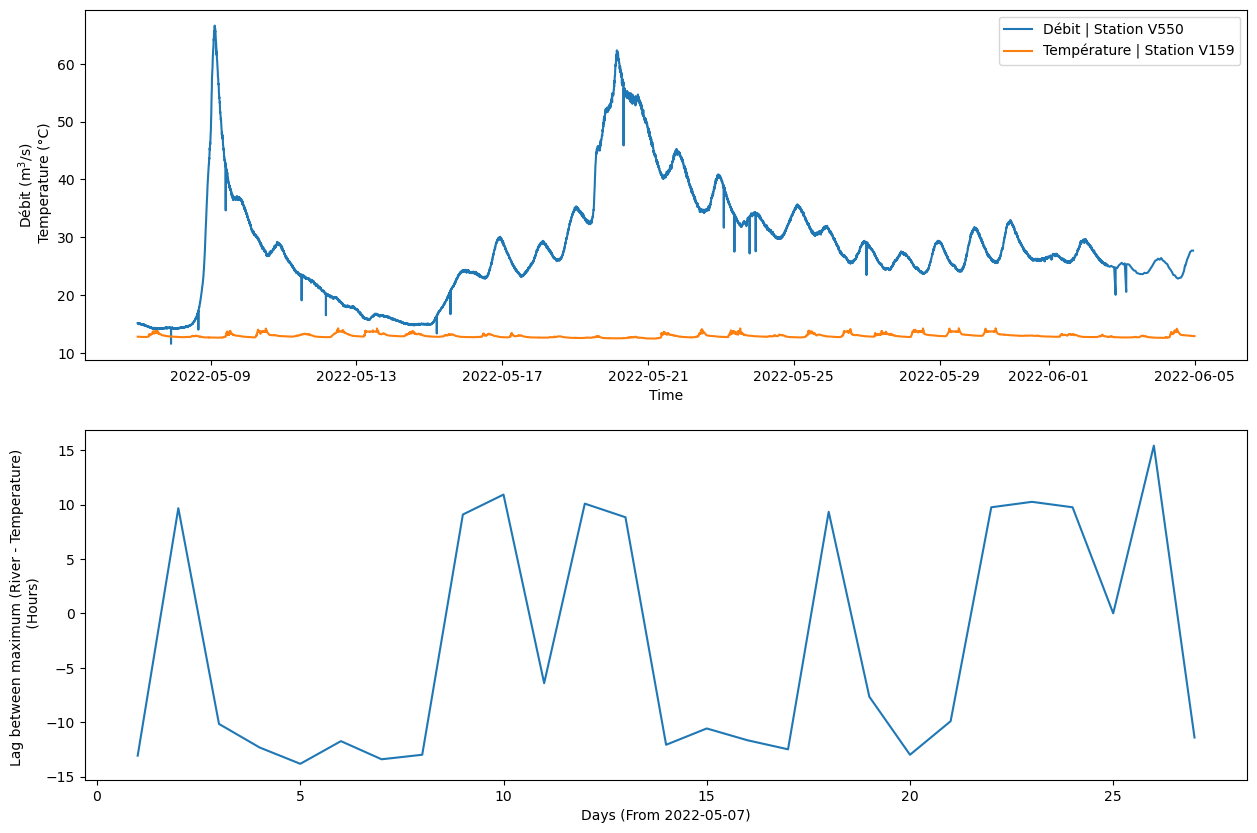

In [9]:
fig = plt.subplots(2, 1, figsize=(15, 10))
plt.subplot(2, 1, 1)


plt.plot(gauging_time, gauging_velos, label = 'Débit | Station V550')
plt.plot(temp_time, temp, label = 'Température | Station V159')
plt.xlabel('Time')
plt.ylabel('Débit (m$^3$/s) \n Temperature (°C)')
plt.legend()


plt.subplot(2, 1, 2)

day = list(range(1,28))
#plt.plot(day,max_temp.date())
#plt.plot(day,max_velos.time())
plt.plot(day, delta_time[:27])
plt.xlabel('Days (From 2022-05-07)')
plt.ylabel('Lag between maximum (River - Temperature) \n (Hours)')
plt.show()

## Confronting wave with water

### Plotting signal amplitude filter between 10-20Hz with discharge and temperature

In [11]:
root = "D:\\Nodes_ablation_zone\All_comp_DP_\\"
#noise_time781, mean781, median781 = amp_noise_mean_median(root,'453020781.',1, '2022.05.08')
noise_time739, mean739, median739, meanall739, medianall739, theta = amp_noise_mean_median(root,'453020773.',20, '2022.05.08',2,5)



2022.05.08.00.00.00.000
Days 3 accomplished in 8.078125 seconds
2022.05.09.00.00.00.000
Days 4 accomplished in 6.734375 seconds
2022.05.10.00.00.00.000
Days 5 accomplished in 6.078125 seconds
2022.05.11.00.00.00.000
Days 6 accomplished in 5.4375 seconds
2022.05.12.00.00.00.000
Days 7 accomplished in 5.828125 seconds
2022.05.13.00.00.00.000
Days 8 accomplished in 6.359375 seconds
2022.05.14.00.00.00.000
Days 9 accomplished in 5.78125 seconds
2022.05.15.00.00.00.000
Days 10 accomplished in 7.03125 seconds
2022.05.16.00.00.00.000
Days 11 accomplished in 5.609375 seconds
2022.05.17.00.00.00.000
Days 12 accomplished in 6.09375 seconds
2022.05.18.00.00.00.000
Days 13 accomplished in 6.5625 seconds
2022.05.19.00.00.00.000
Days 14 accomplished in 6.671875 seconds
2022.05.20.00.00.00.000
Days 15 accomplished in 7.3125 seconds
2022.05.21.00.00.00.000
Days 16 accomplished in 6.578125 seconds
2022.05.22.00.00.00.000
Days 17 accomplished in 6.140625 seconds
2022.05.23.00.00.00.000
Days 18 accomplis

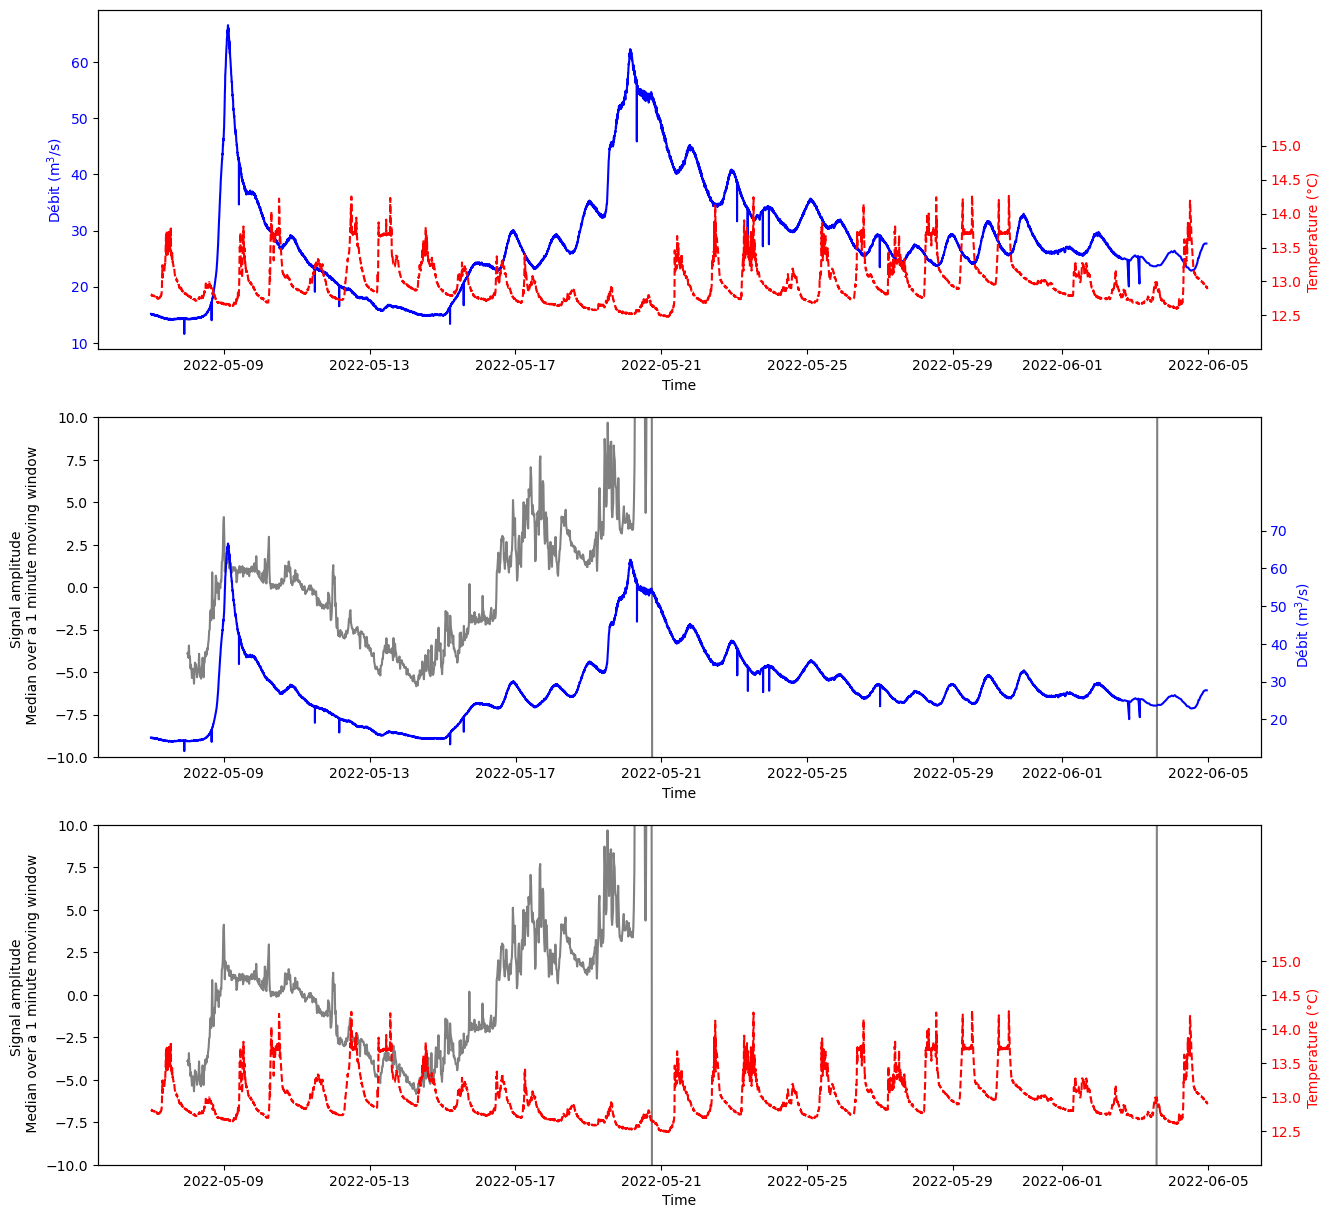

In [12]:
median739 = np.array(median739)
power = 20*np.log10(median739[:,0])
hydronoise_plot(gauging_time, gauging_velos,temp_time, temp, noise_time739, power,(-10,10))

(0.0, 30.0)

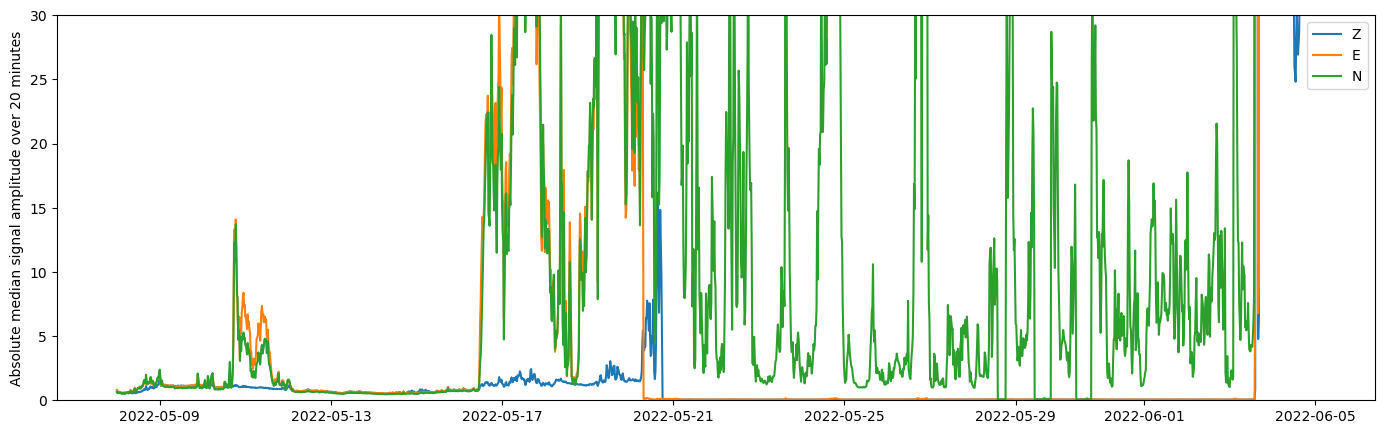

In [13]:
plt.figure(figsize=(17,5))
plt.plot(noise_time739,median739)
plt.ylabel('Absolute median signal amplitude over 20 minutes')
plt.legend(['Z','E','N'])
plt.ylim(0,30)

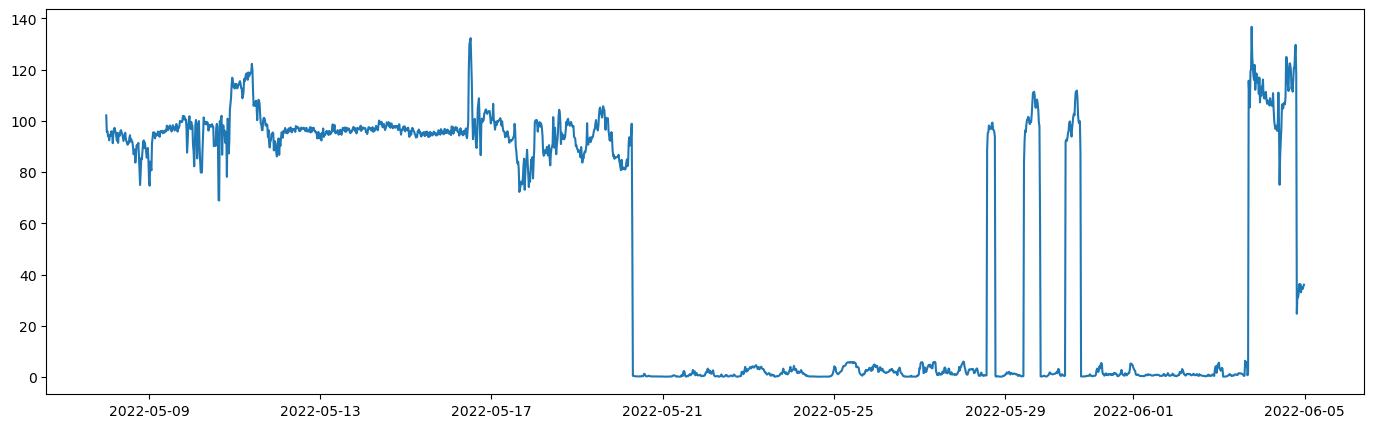

In [14]:
plt.figure(figsize=(17,5))
plt.plot(noise_time739, theta)
plt.show()

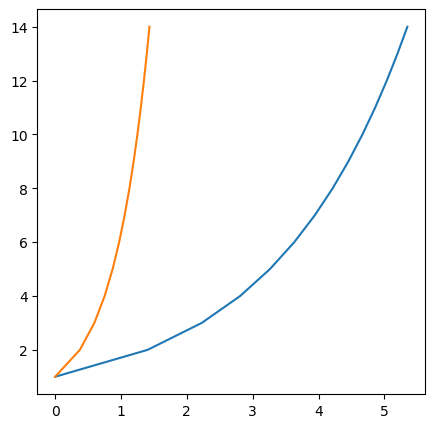

In [15]:
PEXAMP = np.array(list(range(1,15)))

QHYD = np.power(PEXAMP,(14/3))
QPRESS = np.power(PEXAMP,(5/4))

fig = plt.figure(figsize=(5,5))
plt.plot(np.log10(QHYD), PEXAMP)
plt.plot(np.log10(QPRESS), PEXAMP)
plt.show()

### Determining the periodicity of the signals
Crédit :
https://stackoverflow.com/questions/27673496/python-numpy-fft-or-rfft-to-find-period-of-a-wave-instead-of-its-frequiency

In [16]:
from period_finder import period_temp_discharge_noise

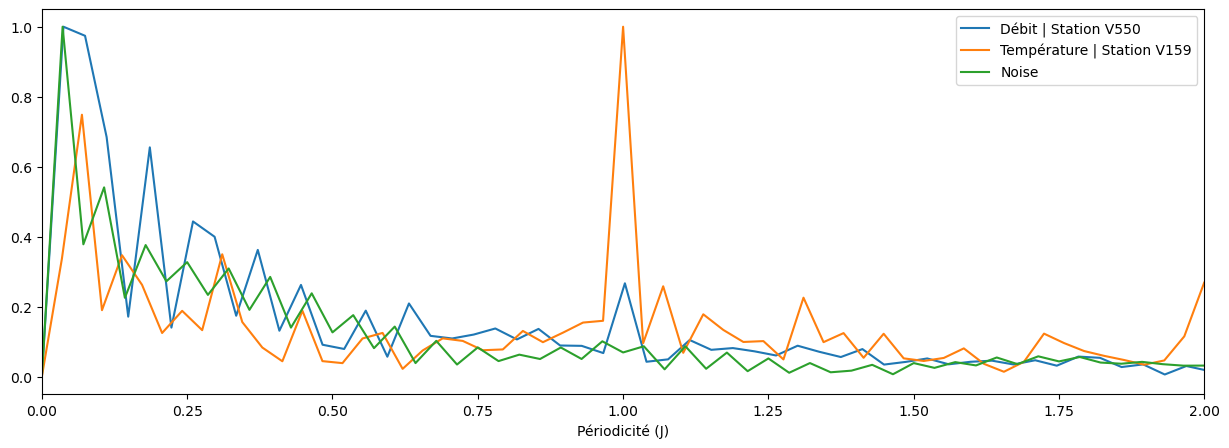

In [17]:
period_temp_discharge_noise(temp, 288, gauging_velos, 288, power, 24*3)

# Plotting from a isolated permanent seismometer

In [18]:
def perm_amp_noise_mean_median(window_size, startdate, lowpass, highpass) :
    
    root = "D:\\permanent\\hus\\HHZ.D\\"

    startdate = datetime.datetime.strptime(startdate, '%Y.%m.%d')
    daynumber = startdate - datetime.datetime.strptime('2022.01.01', '%Y.%m.%d')
    daynumber = int(daynumber.total_seconds()/(24*60*60))

    startnumber = 3
    days = 31 - startnumber

    median = []
    mean = []

    for day in range(days) :
        start = time.process_time()
        date = startdate + datetime.timedelta(days = day)
        datetimeStr = date.strftime("%Y.%m.%d.%H.%M.%S.000")
        print(datetimeStr)
        trace = obspy.read(root+'VI.hus..HHZ.D.2022.'+str(daynumber+day))
        if day == 0 :
            starttime = str(trace[0].stats.starttime)
            starttime = datetime.datetime.strptime(starttime, '%Y-%m-%dT%H:%M:%S.770000Z')
            noise_time = [starttime]

        window = 24*60/window_size
        
        trace.filter('lowpass', freq=lowpass).filter('highpass', freq=highpass)
        
        trace = np.array(trace[0])

        trace = np.abs(trace)


        npts_p_min = int(len(trace)/(24*60))


        for i in range(int(window)) :
            t0 = i*npts_p_min
            t1 = npts_p_min + i*npts_p_min
            array = trace[t0:t1]
            mean.append(np.mean(array))
            median.append(np.median(array))
            if i > 0 and day == 0 :
                noise_time.append(noise_time[i-1]+datetime.timedelta(minutes=window_size))
            elif day > 0 :
                base = int(day*window)
                noise_time.append(noise_time[base+i-1]+datetime.timedelta(minutes=window_size))
        end = time.process_time() 
        print('Days '+str(day+startnumber)+' accomplished in '+str(end-start)+' seconds')
    return noise_time, mean, median

In [40]:
noise_timekal, meankal, mediankal = perm_amp_noise_mean_median(60, '2022.05.08')

2022.05.08.00.00.00.000
Days 3 accomplished in 4.515625 seconds
2022.05.09.00.00.00.000
Days 4 accomplished in 4.875 seconds
2022.05.10.00.00.00.000
Days 5 accomplished in 4.609375 seconds
2022.05.11.00.00.00.000
Days 6 accomplished in 2.625 seconds
2022.05.12.00.00.00.000
Days 7 accomplished in 4.25 seconds
2022.05.13.00.00.00.000
Days 8 accomplished in 5.90625 seconds
2022.05.14.00.00.00.000
Days 9 accomplished in 5.546875 seconds
2022.05.15.00.00.00.000
Days 10 accomplished in 8.15625 seconds
2022.05.16.00.00.00.000
Days 11 accomplished in 8.6875 seconds
2022.05.17.00.00.00.000
Days 12 accomplished in 8.21875 seconds
2022.05.18.00.00.00.000
Days 13 accomplished in 6.53125 seconds
2022.05.19.00.00.00.000
Days 14 accomplished in 8.515625 seconds
2022.05.20.00.00.00.000
Days 15 accomplished in 5.1875 seconds
2022.05.21.00.00.00.000
Days 16 accomplished in 7.765625 seconds
2022.05.22.00.00.00.000
Days 17 accomplished in 6.28125 seconds
2022.05.23.00.00.00.000
Days 18 accomplished in 8.4

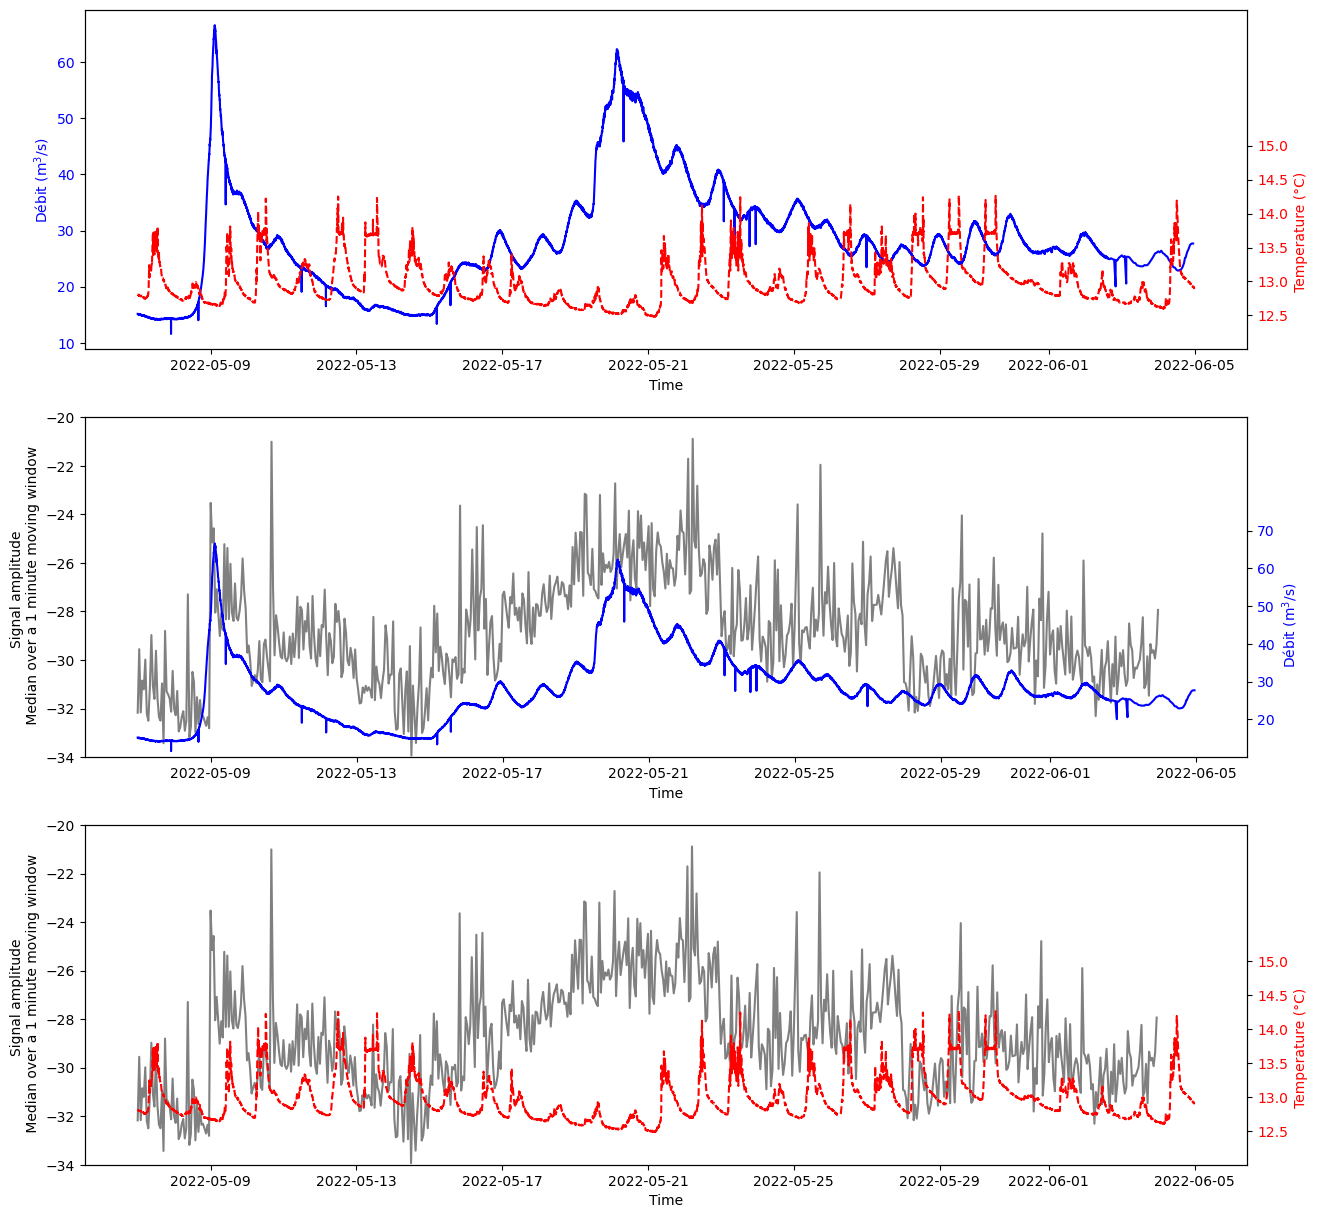

In [48]:
powperm = 20*np.log10(mediankal)
hydronoise_plot(gauging_time, gauging_velos,temp_time, temp, noise_timekal, powperm,(-34,-20))

## Determining the Pw and Pb Ratio


In [19]:
from contribution_pw_pb import pw_pb

In [ ]:
noise_timekal, meanhus25, medianhus25 = perm_amp_noise_mean_median(120, '2022.05.08',2,5)

noise_timekal, meanhus1020, medianhus1020 = perm_amp_noise_mean_median(120, '2022.05.08',10,20)


2022.05.08.00.00.00.000
Days 3 accomplished in 5.046875 seconds
2022.05.09.00.00.00.000
Days 4 accomplished in 5.03125 seconds
2022.05.10.00.00.00.000
Days 5 accomplished in 7.25 seconds
2022.05.11.00.00.00.000
Days 6 accomplished in 4.703125 seconds
2022.05.12.00.00.00.000
Days 7 accomplished in 9.765625 seconds
2022.05.13.00.00.00.000
Days 8 accomplished in 8.546875 seconds
2022.05.14.00.00.00.000
Days 9 accomplished in 7.609375 seconds
2022.05.15.00.00.00.000
Days 10 accomplished in 8.53125 seconds
2022.05.16.00.00.00.000
Days 11 accomplished in 8.71875 seconds
2022.05.17.00.00.00.000
Days 12 accomplished in 6.015625 seconds
2022.05.18.00.00.00.000
Days 13 accomplished in 8.328125 seconds
2022.05.19.00.00.00.000
Days 14 accomplished in 8.734375 seconds
2022.05.20.00.00.00.000
Days 15 accomplished in 9.40625 seconds
2022.05.21.00.00.00.000
Days 16 accomplished in 8.265625 seconds
2022.05.22.00.00.00.000
Days 17 accomplished in 8.53125 seconds
2022.05.23.00.00.00.000
Days 18 accomplis

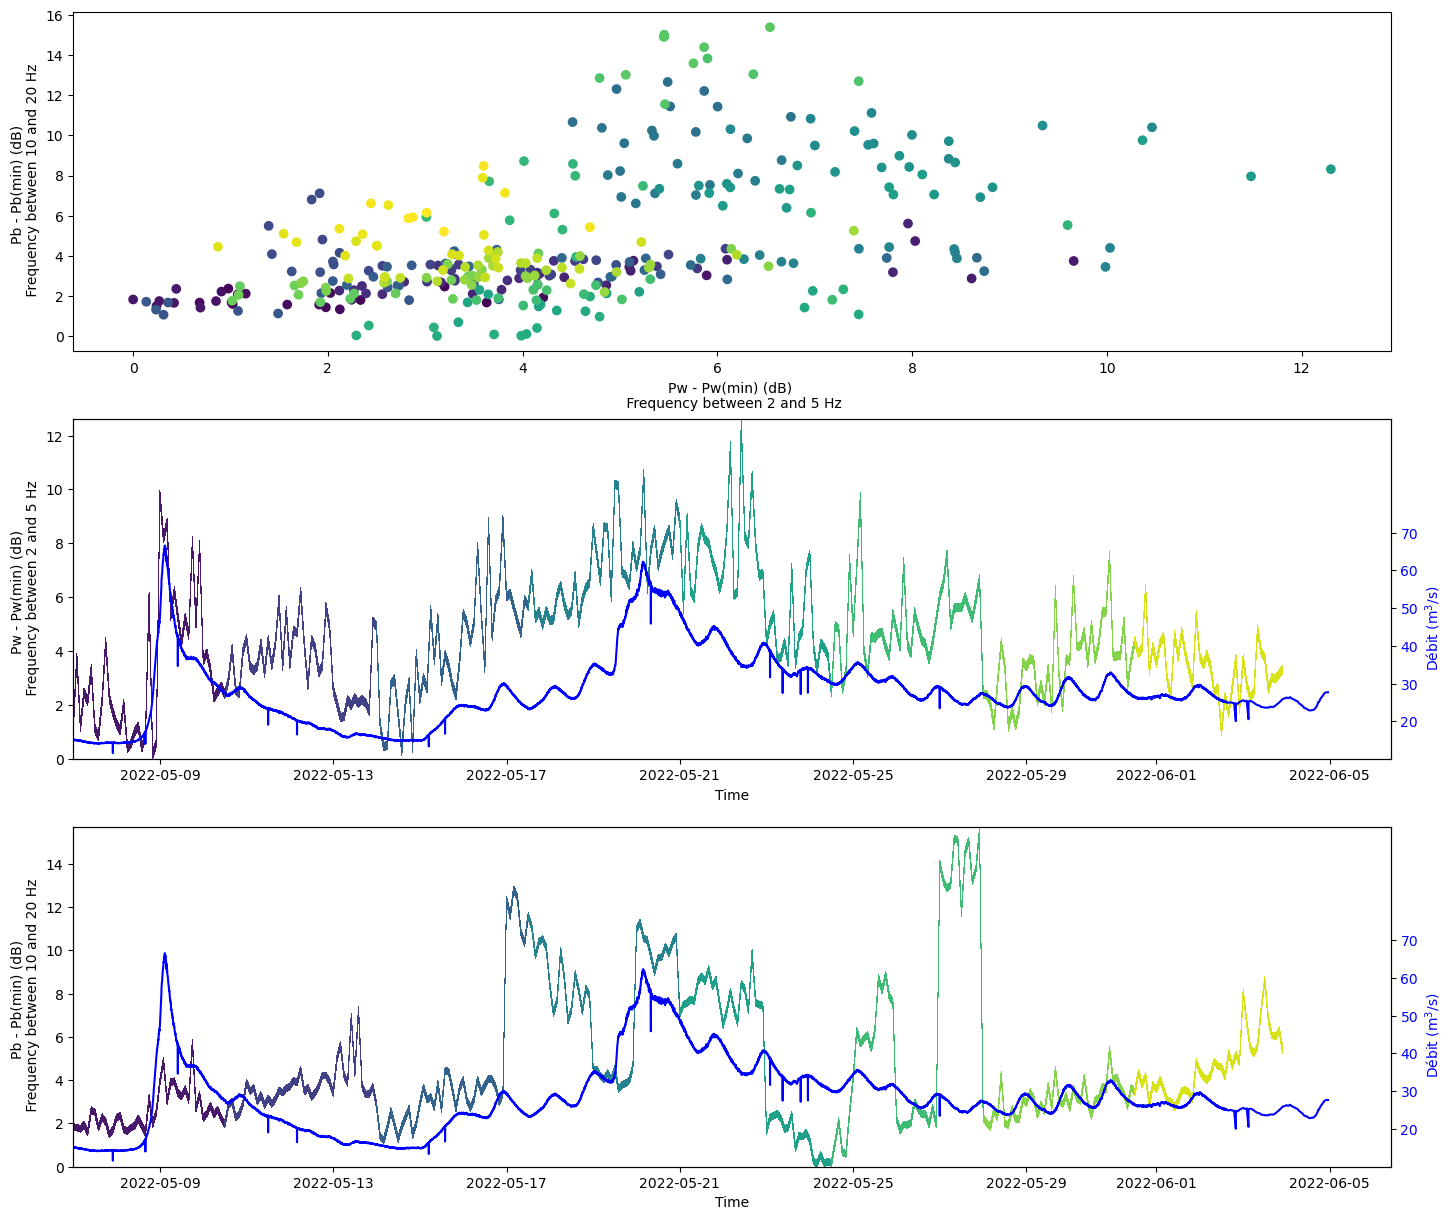

In [113]:
pwhus25 = 20*np.log10(medianhus25)
pbhus1020 = 20*np.log10(medianhus1020)
pwhus25 -= np.min(pwhus25)
pbhus1020 -= np.min(pbhus1020)

noise_timekal = np.array(noise_timekal)

surftime = [noise_timekal,noise_timekal]
surfpw = [pwhus25,pwhus25+0.3]
surfpb = [pbhus1020,pbhus1020+0.3]


fig = plt.subplots(3, 1, figsize=(17, 15))
ax1 = plt.subplot(3, 1, 1)

color = list(range(len(pwhus25)))
color = np.array(color)/28

z_date = [color,color]

ax1.scatter(pwhus25, pbhus1020,c=color)
#ax1.colorbar()
ax1.set_xlabel('Pw - Pw(min) (dB) \n Frequency between 2 and 5 Hz')
ax1.set_ylabel('Pb - Pb(min) (dB) \n Frequency between 10 and 20 Hz')

ax3 = plt.subplot(3, 1, 2)

ax3.set_xlabel('Time') 
ax3.set_ylabel('Pw - Pw(min) (dB) \n Frequency between 2 and 5 Hz') 
ax3.contourf(surftime, surfpw,z_date)
ax3.tick_params(axis ='y') 

ax4 = ax3.twinx() 

ax4.set_xlabel('Time') 
ax4.set_ylabel('Débit (m$^3$/s)'+18*' ', color = 'blue')
ax4.set_ylim((10,100))
ax4.set_yticks([20,30,40,50,60,70])
ax4.plot(gauging_time, gauging_velos, label = 'Débit | Station V550', c='blue')
ax4.tick_params(axis ='y', labelcolor = 'blue')

ax5 = plt.subplot(3, 1, 3)

ax5.set_xlabel('Time') 
ax5.set_ylabel('Pb - Pb(min) (dB) \n Frequency between 10 and 20 Hz') 
ax5.contourf(surftime, surfpb,z_date)
ax5.tick_params(axis ='y') 

ax6 = ax5.twinx() 

ax6.set_xlabel('Time') 
ax6.set_ylabel('Débit (m$^3$/s)'+18*' ', color = 'blue')
ax6.set_ylim((10,100))
ax6.set_yticks([20,30,40,50,60,70])
ax6.plot(gauging_time, gauging_velos, label = 'Débit | Station V550', c='blue')
ax6.tick_params(axis ='y', labelcolor = 'blue')


plt.savefig('plot_hydro\\compar_pw_pb_permhusZ.png')


plt.show()

In [142]:
pw_pb(medianhus25, medianhus1020, noise_timekal, 28, 'hus_Z')

NameError: name 'pw_pb' is not defined

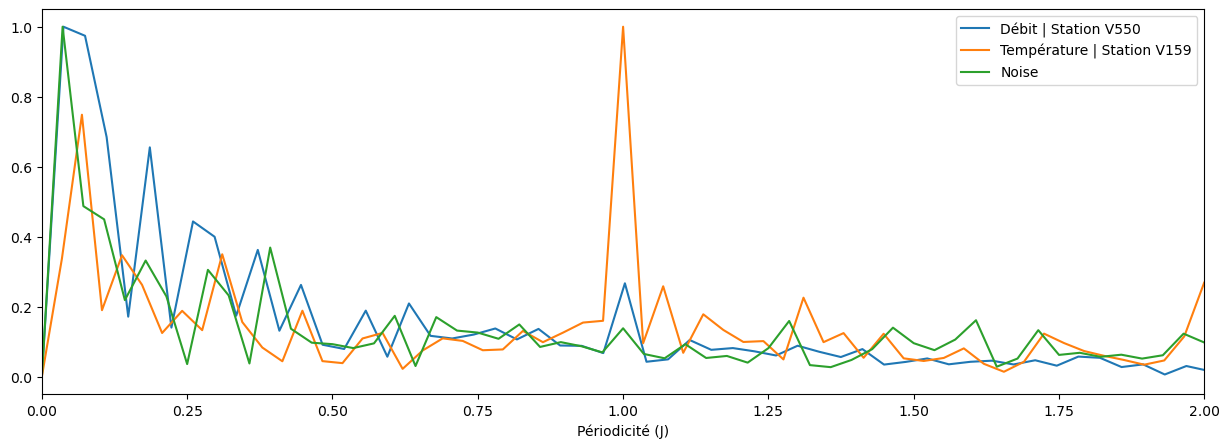

In [133]:
period_temp_discharge_noise(temp, 288, gauging_velos, 288, pwhus25, 12)

In [ ]:
cm = plt.get_cmap('viridis')

In [ ]:
c

(0.244972, 0.28767500000000001, 0.53725999999999996, 1.0)

# Garbage

In [ ]:
max_velos = np.amax(gauging_velos)
min_velos = np.amin(gauging_velos)
normalise_velos = (gauging_velos - min_velos)/(max_velos-min_velos)*1000

max_temp = np.amax(temp)
min_temp = np.amin(temp)
normalise_temp = (temp - min_temp)/(max_temp-min_temp)*500

fig = plt.subplots(3, 1, figsize=(15, 15))
ax1 = plt.subplot(3, 1, 1)


ax1.set_xlabel('Time') 
ax1.set_ylabel('Débit (m$^3$/s)', color = 'blue') 
ax1.plot(gauging_time, gauging_velos, label = 'Débit | Station V550', c='blue')
ax1.tick_params(axis ='y', labelcolor = 'blue') 
  
# Adding Twin Axes

ax2 = ax1.twinx() 
    
ax2.set_ylabel('Temperature (°C)'+24*' ', color = 'red')
ax2.set_ylim((12,17))
ax2.set_yticks([12.5,13,13.5,14,14.5,15])
ax2.plot(temp_time, temp, label = 'Température | Station V159', c='red', linestyle='--')
ax2.tick_params(axis ='y', labelcolor = 'red') 


plt.subplot(3, 1, 2)

#plt.plot(noise_time773,median773, label='SS_20773')
plt.xlim((temp_time[0],temp_time[len(temp_time)-1]))
plt.ylim((0,1500))
plt.plot(noise_time739,median739, label='SS_20739')
plt.plot(gauging_time,normalise_velos, label = 'Débit normalise 0-1000 | Station V550', c='darkgreen')
plt.xlabel('Time')
plt.ylabel('Signal amplitude \n Median over a 1 minute moving window')

plt.legend()

plt.subplot(3, 1, 3)

#plt.plot(noise_time773,median773, label='SS_20773')
plt.xlim((temp_time[0],temp_time[len(temp_time)-1]))
plt.ylim((0,1500))
plt.plot(noise_time739,median739, label='SS_20739')
plt.plot(temp_time,normalise_temp, label = 'Temperature normalise 0-500 | Station V159', c='red',linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Signal amplitude \n Median over a 1 minute moving window')

plt.legend()

plt.show()



In [ ]:
file_precip = '\\PRECIP\\04176099999.csv'
starttime = '2022-05-07'
start = 0

precip_time = []
precip = []

with open(direct+file_precip) as file :
    readcsv = csv.reader(file, delimiter=',')
    line = 0
    for row in readcsv :
        if line > 0 :
            print(row[aa1])
        if line == 0 :
            aa1 = row.index('AA1')
            date = row.index('DATE')
        elif line > 0 and row[date][0:10] == starttime :
            print(row[date][0:10])
            start = 1
        elif start == 1 :
            precip_time.append(datetime.datetime.strptime(row[date],'%Y-%m-%dT%H:%M:%S'))
            precip.append(float(row[aa1][3:7]))
        line += 1
